# HELTH INSURANCE CROSS SELL PREDICTION

## Cross Sell and Up Sell

### Cross Sell

Cross-selling is the action or practice of selling an additional product or service to an existing customer. In practice, businesses define cross-selling in many different ways. Elements that might influence the definition might include the size of the business, the industry sector it operates within and the financial motivations of those required to define the term.
The objective of cross-selling can be either to increase the income derived from the client or to protect the relationship with the client or clients. The approach to the process of cross-selling can be varied.
Unlike the acquiring of new business, cross-selling involves an element of risk that existing relationships with the client could be disrupted. For that reason, it is important to ensure that the additional product or service being sold to the client or clients enhances the value the client or clients get from the organization.
In practice, large businesses usually combine cross-selling and up-selling techniques to increase revenue.

### Up sell

Upselling is a sales technique where a seller invites the customer to purchase more expensive items, upgrades, or other add-ons to generate more revenue. While it usually involves marketing more profitable services or products, it can be simply exposing the customer to other options that were perhaps not considered (A different technique is cross-selling in which a seller tries to sell something else). In practice, large businesses usually combine upselling and cross-selling to maximize revenue.

### Upselling vs Cross-selling

Upselling is the practice in which a business tries to motivate customers to purchase a higher-end product, an upgrade, or an additional item in order to make a more profitable sale. For instance, a salesperson may influence a customer into purchasing the newest version of an item, rather than the less-expensive current model, by pointing out its additional features. A similar marketing technique is cross-selling, where the salesperson suggests the purchase of additional products for sale. For example, he might say "Would you like some ice cream to go with that cake?" Both techniques increase profits for businesses, but research has shown that upselling is generally more effective than cross-selling. Cross-selling means to offer more services to existing customer and upselling means enhance sale by describing features of new product.

## Context
### The Insurance All Company ###
Disclaimer: The following context is completely fictional, the company, the context, the CEO, the business questions exist only in my imagination.

Insurance All is an Insurance company that has provided Health Insurance to its customers and the product team is analyzing the possibility of offering policyholders a new product: Vehicle Insurance.

As with health insurance, customers of this new Vehicle Insurance plan need to pay an amount annually to Insurance All to obtain an amount insured by the company, aimed at the costs of an eventual accident or damage to the vehicle.

Insurance All conducted a survey of about 380,000 customers about their interest in joining a new auto insurance product last year. All customers expressed interest or not in purchasing auto insurance and these responses were saved in a database along with other customer attributes.

The product team selected 127 thousand new customers who did not respond to the survey to participate in a campaign, in which they will receive the offer of the new auto insurance product. The offer will be made by the sales team through telephone calls.

However, the sales team has the capacity to make 20 thousand calls within the campaign period.

### The challenge ###
In that context, you were hired as a Data Science consultant to build a model that predicts whether or not the customer would be interested in auto insurance.

With its solution, the sales team hopes to be able to prioritize the people with the greatest interest in the new product and, thus, optimize the campaign by making only contacts with customers most likely to make the purchase.

As a result of your consultancy, you will need to deliver a report containing some analysis and answers to the following questions:

- Main insights on the most relevant attributes of customers interested in purchasing auto insurance.

- What percentage of customers interested in purchasing auto insurance will the sales team be able to reach by making 20,000 calls?

- And if the sales team's capacity increases to 40,000 calls, what percentage of customers interested in purchasing auto insurance will the sales team be able to contact?

- How many calls does the sales team need to make to contact 80% of customers interested in purchasing auto insurance?

# 0.0 SETUP

## 0.1 Imports

In [1]:
import psycopg2 as pg
import pandas as pd
import numpy as np
import pandas.io.sql as psql
import seaborn             as sns
import matplotlib.pyplot   as plt
import matplotlib.gridspec as gridspec
from IPython.display       import Image
import warnings
warnings.filterwarnings( 'ignore' )

## 0.2 Helpers Functions

## 0.3 Loading Data

In [2]:
host = 'comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com'
port = '5432'
database = 'comunidadedsdb'
username = 'member'
password = 'cdspa'

### 0.3.1 Schema Query

In [3]:
try:
    conn = pg.connect("dbname=comunidadedsdb user=member password=cdspa host=comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com port=5432")

except:
    print ("Unable to connect to the database.")
    
cursor = conn.cursor()
query_schema = "SELECT nspname FROM pg_catalog.pg_namespace"

try:
    cursor.execute(query_schema)

except:
    print ("Can't drop our test database!")

record = cursor.fetchall()
print(record)

cursor.close()
conn.close()

[('pg_toast',), ('pg_temp_1',), ('pg_toast_temp_1',), ('pg_catalog',), ('information_schema',), ('public',), ('pa004',)]


### 0.3.2 Table Query

In [4]:
try:
    conn = pg.connect("dbname=comunidadedsdb user=member password=cdspa host=comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com port=5432")

except:
    print ("Unable to connect to the database.")
    
cursor = conn.cursor()
query_tables = "SELECT tablename FROM pg_tables WHERE schemaname='pa004'"

try:
    cursor.execute(query_tables)

except:
    print ("Can't drop our test database!")

record = cursor.fetchall()
print(record)

cursor.close()
conn.close()

[('users',), ('vehicle',), ('insurance',)]


### 0.3.3 Collect Data

In [5]:
conn = pg.connect("dbname=comunidadedsdb user=member password=cdspa host=comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com port=5432")

query_all_tables = """SELECT * FROM pa004.users u LEFT JOIN pa004.vehicle v ON (u.id = v.id)
                                                    LEFT JOIN PA004.insurance i ON (u.id = i.id)"""

In [6]:
df1 = pd.read_sql( query_all_tables, conn )
conn.close()

# 1.0 DATA DESCRIPTION

In [7]:
df1 = df1.drop( df1.columns[[5,9]], axis = 1 )
df1.head()

,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,Male,23,11.0,152.0,1,< 1 Year,Yes,0,23367.0,249,0
1,Female,41,15.0,14.0,1,1-2 Year,No,1,31409.0,221,0
2,Female,25,35.0,152.0,1,< 1 Year,No,1,46622.0,299,0
3,Female,26,8.0,160.0,1,< 1 Year,No,0,2630.0,136,0
4,Male,45,8.0,124.0,1,1-2 Year,Yes,0,42297.0,264,0


## 1.1 Features Description

The data set includes the following information:

**Id:** customer's unique identifier.

**Gender:** gender of the client.

**Age:** age of the customer.

**Driving License:** 0, the customer is not allowed to drive and 1, the customer is allowed to drive (CNH - National Driver's License).

**Region Code:** code of the customer's region.

**Previously Insured:** 0, the customer does not have auto insurance and 1, the customer already has auto insurance.

**Vehicle Age:** age of the vehicle.

**Vehicle Damage:** 0, customer has never had his vehicle damaged in the past and 1, customer has had his vehicle damaged in the past.

**Annual Premium:** amount the customer paid the company for annual health insurance.

**Policy sales channel:** anonymous code for the customer contact channel.

**Vintage:** number of days the customer joined the company through the purchase of health insurance.

**Response:** 0, the customer is not interested and 1, the customer is interested.

## 1.2 Data Dimentions

In [8]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of cols: {}'.format(df1.shape[1]))

Number of rows: 381109
Number of cols: 11


## 1.3 Data Types

In [9]:
df1.dtypes

gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
driving_license           int64
vehicle_age              object
vehicle_damage           object
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
dtype: object

## 1.4 Check NA

In [10]:
df1.isna().sum()

gender                  0
age                     0
region_code             0
policy_sales_channel    0
driving_license         0
vehicle_age             0
vehicle_damage          0
previously_insured      0
annual_premium          0
vintage                 0
response                0
dtype: int64

## 1.5 Change Types

In [11]:
df1['region_code'] = df1['region_code'].astype(int)
df1['policy_sales_channel'] = df1['policy_sales_channel'].astype(int)
df1['annual_premium'] = df1['annual_premium'].astype(int)

In [12]:
df1.dtypes

gender                  object
age                      int64
region_code              int32
policy_sales_channel     int32
driving_license          int64
vehicle_age             object
vehicle_damage          object
previously_insured       int64
annual_premium           int32
vintage                  int64
response                 int64
dtype: object

**Data types :** int64 (5), int32 (3) and object (3)

## 1.6 Descriptive Statistical

In [13]:
num_attributes = df1.select_dtypes(include = ['int64', 'int32'])
cat_attributes = df1.select_dtypes(exclude = ['int64', 'int32'])

### 1.6.1 Numerical Attributes

In [14]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - Std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# Concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,age,20.0,85.0,65.0,38.822584,36.0,15.511591,0.672539,-0.565655
1,region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-0.115266,-0.867857
2,policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-0.900008,-0.970810
3,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-21.595182,464.354302
4,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,0.167747,-1.971871
5,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087,34.004569
6,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,0.003030,-1.200688
7,response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906,3.298788


### 1.6.2 Categorical Attributes

In [15]:
cat_attributes.apply( lambda x: x.unique().shape[0])

gender            2
vehicle_age       3
vehicle_damage    2
dtype: int64

<AxesSubplot:xlabel='vehicle_damage', ylabel='response'>

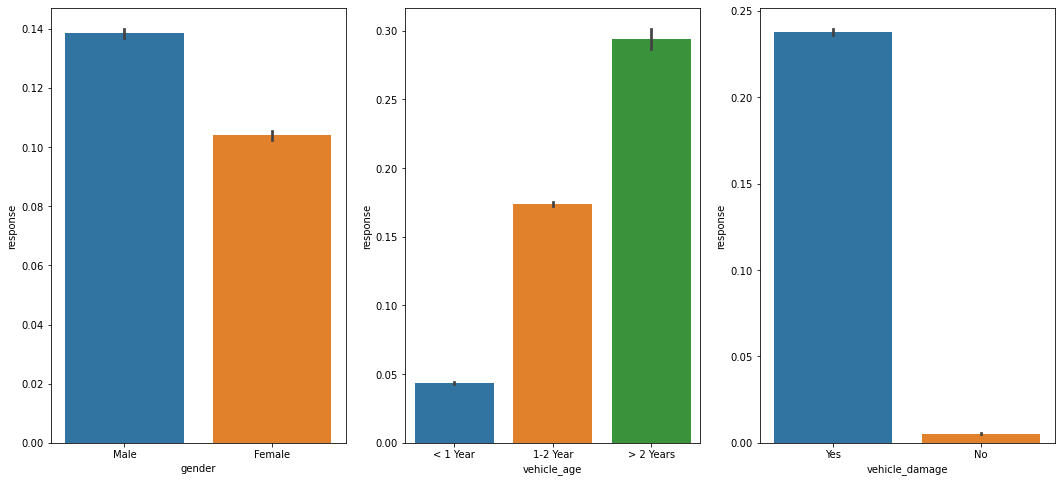

In [16]:
plt.figure(figsize = (18, 8))

plt.subplot(1,3,1)
sns.barplot(x = 'gender', y = 'response', data = df1, )

plt.subplot(1,3,2)
sns.barplot(x = 'vehicle_age', y = 'response', data = df1, )

plt.subplot(1,3,3)
sns.barplot(x = 'vehicle_damage', y = 'response', data = df1, )

# 2.0 FEATURE ENGENEERING

In [17]:
df2 = df1.copy()

## 2.1 Mind Map Hypotheses

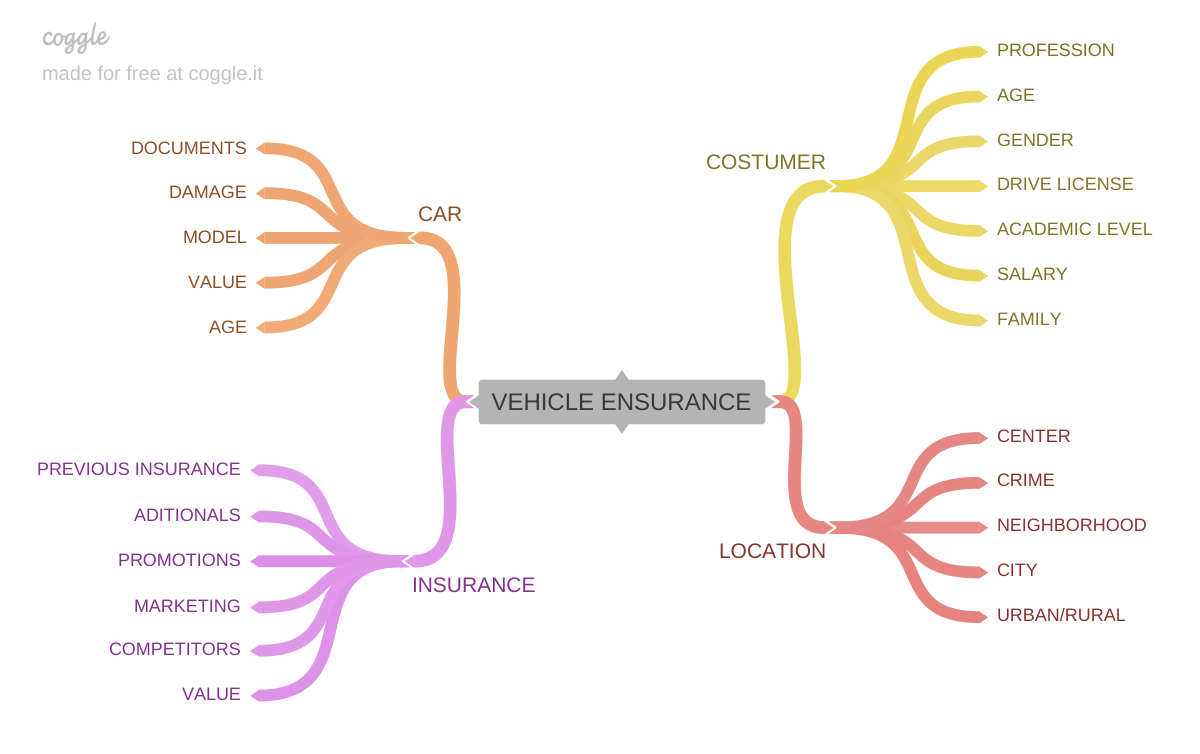

In [18]:
Image ('img/VEHICLE_ENSURANCE.png')

## 2.2 Hypotheses criation

### 2.2.1 Hypotheses Costumer

**1.** Customers with high-paying jobs should want more a motor ensurance.

**2.** Older customers should want more a motor ensurance.

**3.** Female customers should want more a motor ensurance.

**4.** Customers without drive license shouldn't want a motor ensurance.

**5.** Customers with high academy level should want more a motor ensurance.

**6.** Customers with family should want more a motor ensurance.

**7.** Customers with high number of children should want more a motor ensurance.

**8.** Customers with high Annual Premium should want more a motor ensurance.

### 2.2.2 Hypotheses Location

**1.** Customers that lives on city centers should want more a motor ensurance.

**2.** Customers living in a violent region should want more a motor ensurance.

**3.** Customers living in a poor neighborhood should want more a motor ensurance.

**4.** Customers living in big cities should want more a motor ensurance.

**5.** Customers living in the countryside shouldn't want a motor ensurance.

### 2.2.3 Hypotheses Car

**1.** Customers with cars without documents shouldn't want a motor ensurance.

**2.** Customers that had previous acidents should want more a motor ensurance.

**3.** Customers who own a more expensive car model should want more a motor ensurance.

**4.** ustomers who own a more stolen car model should want more car insurance.

**5.** Customers who own a more expensive car should want more motor insurance.

**6.** Customers who own a newer car should want more auto insurance.

### 2.2.4 Hypotheses Insurance

**1.** Customers that had a previous auto ensurance should want more a motor ensurance.

**2.** Motor insurance with additional offers should sell more.

**3.** Motor insurance in promotions offers should sell more.

**4.** Motor insurance with a good marketing should sell more.

**5.** Motor insurance with less competitors should sell more.

**6.** Motor insurance with lower values should sell more.

**7.** Customers who use life insurance more, should want auto insurance

## 2.3 Hypotheses final list

**1.** Older customers should want more a motor ensurance.

**2.** Female customers should want more a motor ensurance.

**3.** Customers without drive license shouldn't want a motor ensurance.

**4.** Customers with high Annual Premium should want more a motor ensurance.

**5.** Customers that lives on city centers should want more a motor ensurance.

**6.** Customers that had previous acidents should want more a motor ensurance.

**7.** Customers who own a newer car should want more auto insurance.

**8.** Customers that had a previous auto ensurance should want more a motor ensurance.

**9.** Customers who use life insurance more, should want auto insurance.

## 2.4 Feature Engineering

# 3.0 VARIABLE FILTERING

In [19]:
df3 = df2.copy()

## 3.1 Columns Selection

In [20]:
#cols_drop = df3['policy_sales_channel']
df3 = df3.drop('policy_sales_channel', axis = 1)

In [21]:
df3.head()

,gender,age,region_code,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,Male,23,11,1,< 1 Year,Yes,0,23367,249,0
1,Female,41,15,1,1-2 Year,No,1,31409,221,0
2,Female,25,35,1,< 1 Year,No,1,46622,299,0
3,Female,26,8,1,< 1 Year,No,0,2630,136,0
4,Male,45,8,1,1-2 Year,Yes,0,42297,264,0


# 4.0 EXPLORATORY DATA ANALYSIS

In [22]:
df4 = df3.copy()

## 4.1 Univariate Analysis

### 4.1.1 Response Variable

<AxesSubplot:xlabel='response', ylabel='Density'>

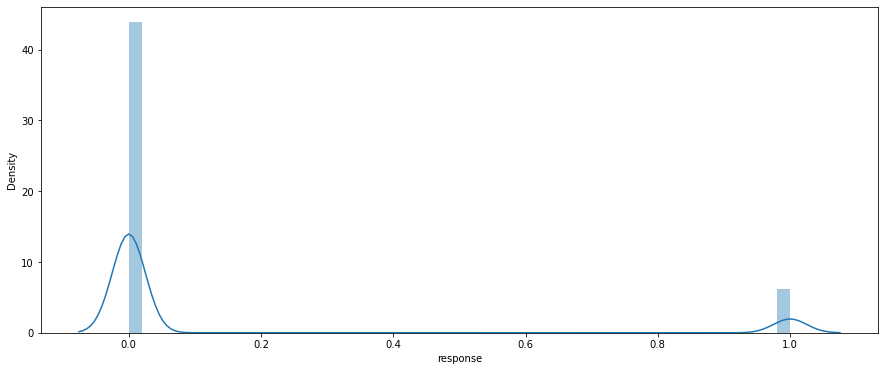

In [25]:
plt.figure(figsize = (15,6))
sns.distplot(df4['response'])

### 4.1.2 Numerical Variable

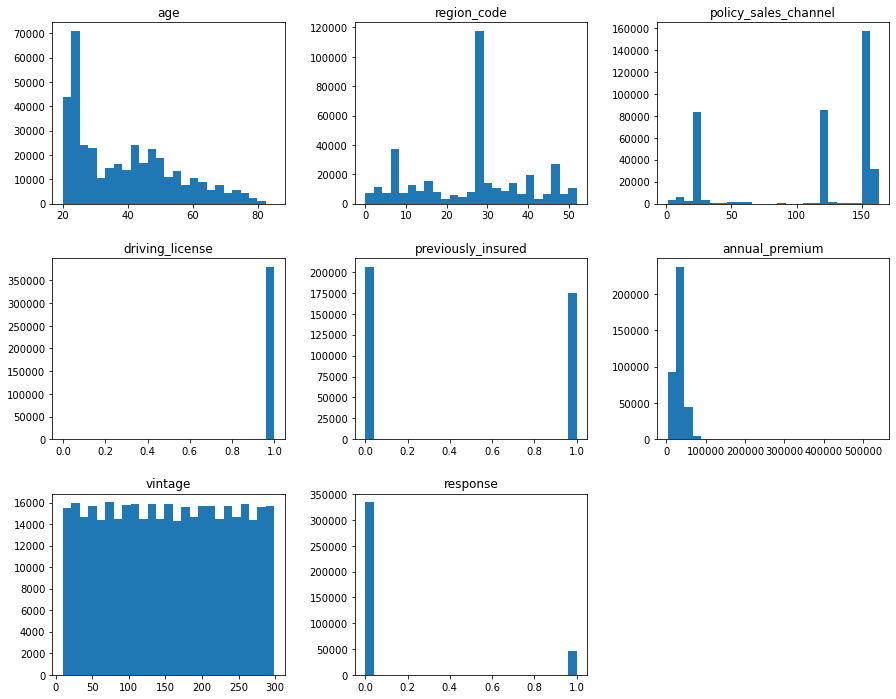

In [24]:
fig = plt.figure(figsize = (15,12))
num_attributes.hist(bins = 25, ax = fig.gca(), grid = False);

### 4.1.3 Categorical Variable

<AxesSubplot:xlabel='vehicle_damage', ylabel='count'>

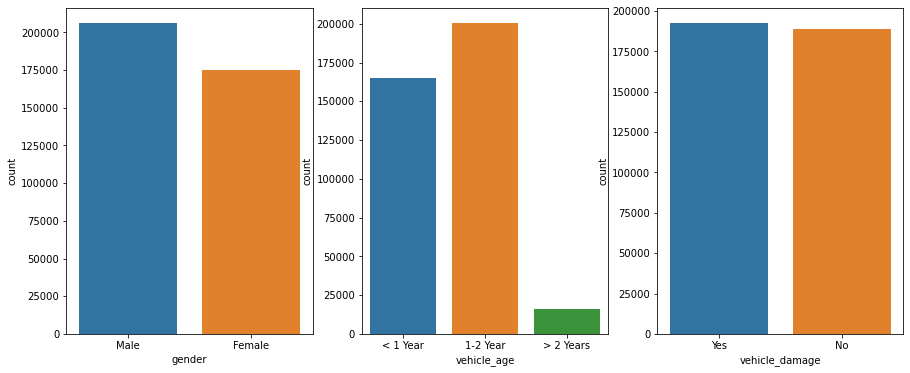

In [32]:
fig = plt.figure(figsize = (15,6))

# gender
plt.subplot (1,3,1)
sns.countplot(df4['gender'])

# vehicle_age
plt.subplot (1,3,2)
sns.countplot(df4['vehicle_age'])

# vehicle_damage
plt.subplot (1,3,3)
sns.countplot(df4['vehicle_damage'])


## 4.2 Bivariate Analysis

### H1: Older customers should want more a motor ensurance.
**TRUE.** 

<AxesSubplot:>

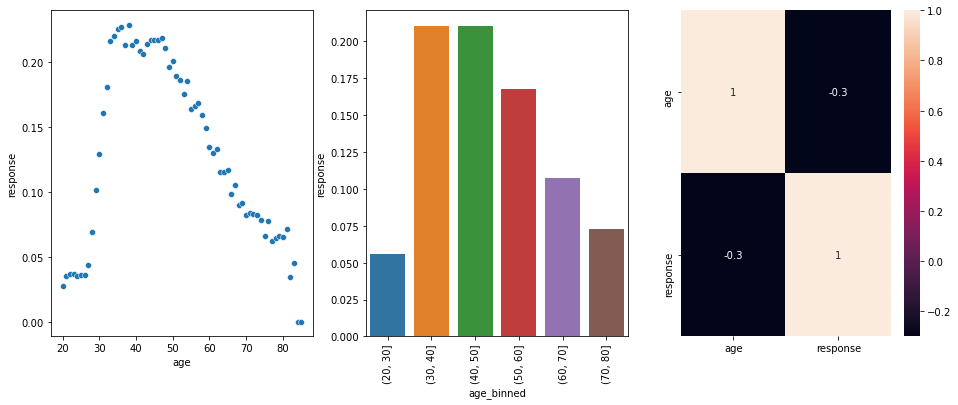

In [35]:
fig = plt.figure(figsize = (16,6))

plt.subplot (1,3,1)
aux1 = df4[['age', 'response']].groupby ('age').mean().reset_index()
sns.scatterplot(x = 'age', y = 'response', data = aux1)

plt.subplot (1,3,2)
bins = list(np.arange(20, 90, 10))
aux1['age_binned'] = pd.cut (aux1['age'], bins = bins)
aux2 = aux1[['age_binned', 'response']].groupby ('age_binned').mean().reset_index()
sns.barplot(x = 'age_binned', y = 'response', data = aux2)
plt.xticks(rotation = 90);

plt.subplot (1,3,3)
sns.heatmap(aux1.corr(method= 'pearson'), annot = True)

### H2: Female customers should want more a motor ensurance.

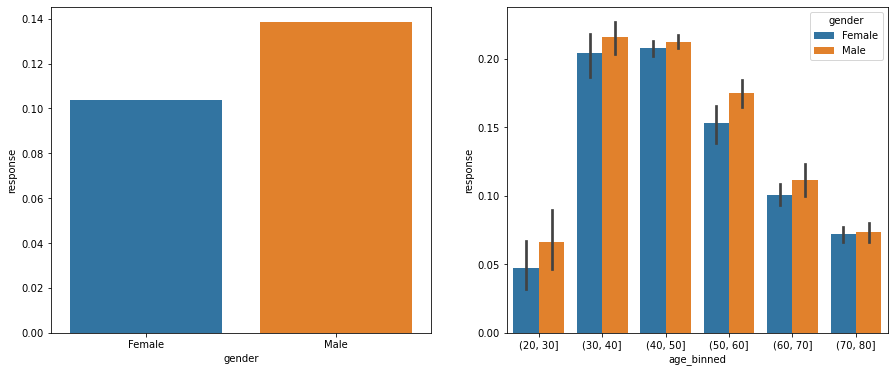

In [53]:
fig = plt.figure(figsize = (15,6))

plt.subplot (1,2,1)
aux1 = df4[['gender', 'response']].groupby('gender').mean().reset_index()
sns.barplot (x = 'gender', y = 'response', data = aux1)


plt.subplot (1,2,2)
aux2 = df4[['gender', 'age', 'response']].groupby(['age', 'gender']).mean().reset_index()
bins = list(np.arange(20, 90, 10))
aux2['age_binned'] = pd.cut (aux2['age'], bins = bins)
aux3 = aux2[['gender','age_binned', 'response']].groupby ('gender').mean().reset_index()
#aux2 = df4[['age','gender', 'response']].groupby (['age', 'gender']).mean().reset_index()
sns.barplot(x = 'age_binned', y = 'response', hue = 'gender', data = aux2);

### H3: Customers without drive license shouldn't want a motor ensurance.

<AxesSubplot:>

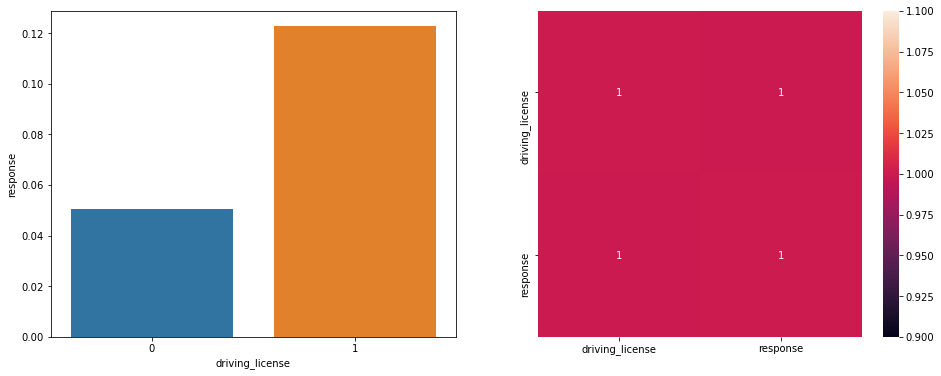

In [42]:
fig = plt.figure(figsize = (16,6))

plt.subplot (1,2,1)
aux1 = df4[['driving_license', 'response']].groupby('driving_license').mean().reset_index()
sns.barplot (x = 'driving_license', y = 'response', data = aux1)

plt.subplot (1,2,2)
sns.heatmap(aux1.corr(method= 'pearson'), annot = True)

### H4: Customers with high Annual Premium should want more a motor ensurance.

### H5: Customers that lives on city centers should want more a motor ensurance.

### H6: Customers that had previous acidents should want more a motor ensurance.

### H7: Customers who own a newer car should want more auto insurance.

### H8: Customers that had a previous auto ensurance should want more a motor ensurance.

### H9: Customers who use life insurance more, should want auto insurance.